### PREPROCESSING DATA

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense

In [13]:
data = pd.read_csv("creditcard.csv")

sc = StandardScaler()
data[['Time', 'Amount']] = sc.fit_transform(data[['Time', 'Amount']])

X = data.drop('Class', axis=1).values
y = data['Class']

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


<Axes: xlabel='Class'>

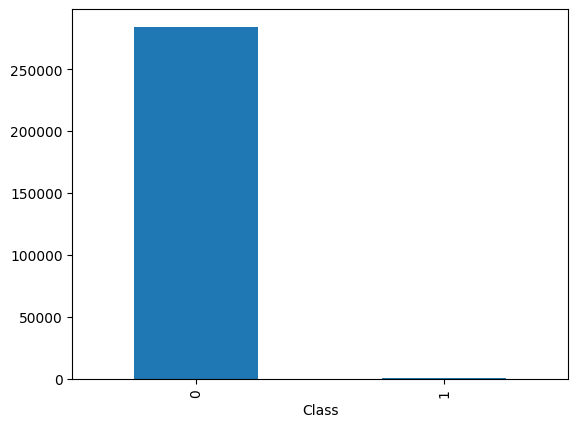

In [14]:
data['Class'].value_counts().plot.bar()

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=0)

accuracy_scores.append(test_accuracy)
loss_scores.append(test_loss)

Number transactions x_train dataset:  (227845, 30)
Number transactions y_train dataset:  (227845,)
Number transactions x_test dataset:  (56962, 30)
Number transactions y_test dataset:  (56962,)


In [ ]:
if len(accuracy_scores) > 0:
    average_accuracy = np.mean(accuracy_scores)
    average_loss = np.mean(loss_scores)
    print("Average Accuracy (Cross-Validation):", average_accuracy)
    print("Average Loss (Cross-Validation):", average_loss)
else:
    print("Evaluation metrics not collected during cross-validation.")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel(' ')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel(' ')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### HANDLING IMBALANCE DATA


In [16]:
over = BorderlineSMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)

steps = [('o', over), ('u', under)]

Counter before resampling: Counter({0: 227451, 1: 394})
Counter after resampling: Counter({0: 162464, 1: 113725})


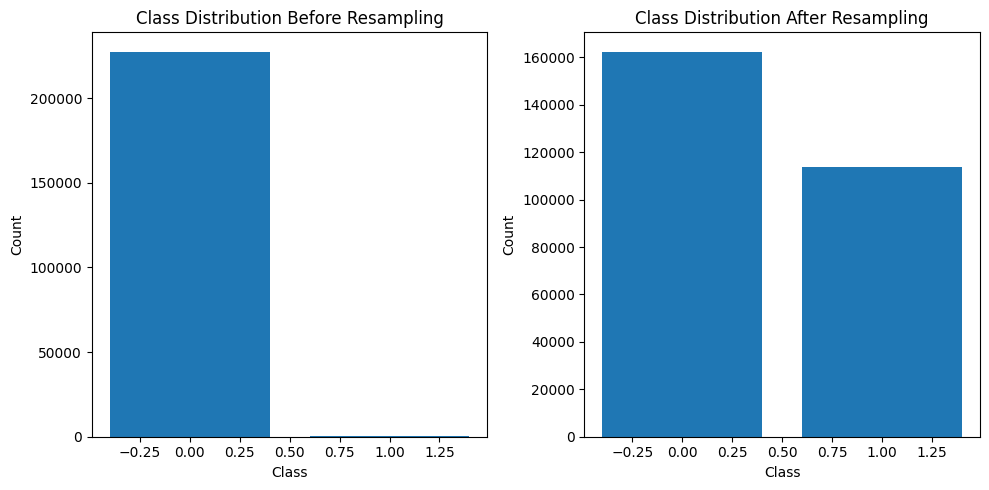

In [17]:
import collections

pipeline = Pipeline(steps=steps)

x_sm, y_sm = pipeline.fit_resample(x_train, y_train)

print("Counter before resampling:", collections.Counter(y_train))
print("Counter after resampling:", collections.Counter(y_sm))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].bar(collections.Counter(y_train).keys(), collections.Counter(y_train).values())
axes[0].set_title('Class Distribution Before Resampling')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

axes[1].bar(collections.Counter(y_sm).keys(), collections.Counter(y_sm).values())
axes[1].set_title('Class Distribution After Resampling')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### MODELING ANN AND SIMULATION RESULTS

In [18]:
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

accuracy_scores = []
loss_scores = []

In [19]:
for train_index, test_index in kfold.split(x_sm, y_sm):
    X_train, X_val = x_sm[train_index], x_sm[test_index]
    y_train, y_val = y_sm[train_index], y_sm[test_index]

    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=0)

    test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=0)

    accuracy_scores.append(test_accuracy)
    loss_scores.append(test_loss)


In [20]:
if len(accuracy_scores) > 0:
    average_accuracy = np.mean(accuracy_scores)
    average_loss = np.mean(loss_scores)
    print("Average Accuracy (Cross-Validation):", average_accuracy)
    print("Average Loss (Cross-Validation):", average_loss)
else:
    print("Evaluation metrics not collected during cross-validation.")

Average Accuracy (Cross-Validation): 0.9993663728237152
Average Loss (Cross-Validation): 0.004446402890607715


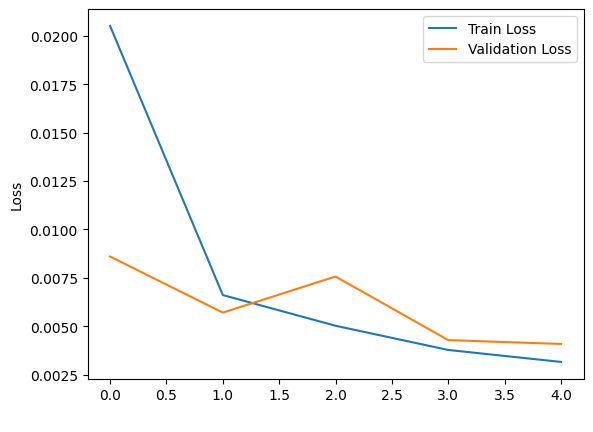

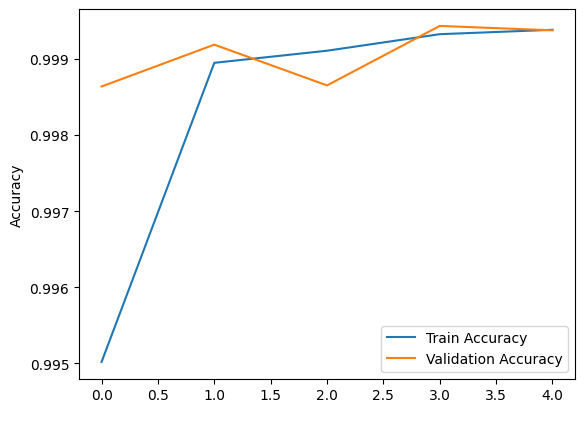

In [21]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel(' ')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel(' ')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
train_accuracy_avg = np.mean(history.history['accuracy'])
validation_accuracy_avg = np.mean(history.history['val_accuracy'])
train_loss_avg = np.mean(history.history['loss'])
validation_loss_avg = np.mean(history.history['val_loss'])

print("Rata-rata Akurasi Data Train:", train_accuracy_avg)
print("Rata-rata Akurasi Data Validation:", validation_accuracy_avg)
print("Rata-rata Loss Data Train:", train_loss_avg)
print("Rata-rata Loss Data Validation:", validation_loss_avg)

Rata-rata Akurasi Data Train: 0.9983576536178589
Rata-rata Akurasi Data Validation: 0.9990586280822754
Rata-rata Loss Data Train: 0.007812685938552022
Rata-rata Loss Data Validation: 0.006045291945338249


4316/4316 [==============================] - 4s 906us/step
Area Under Precision-Recall Curve (AUPRC): 0.9998198978198549


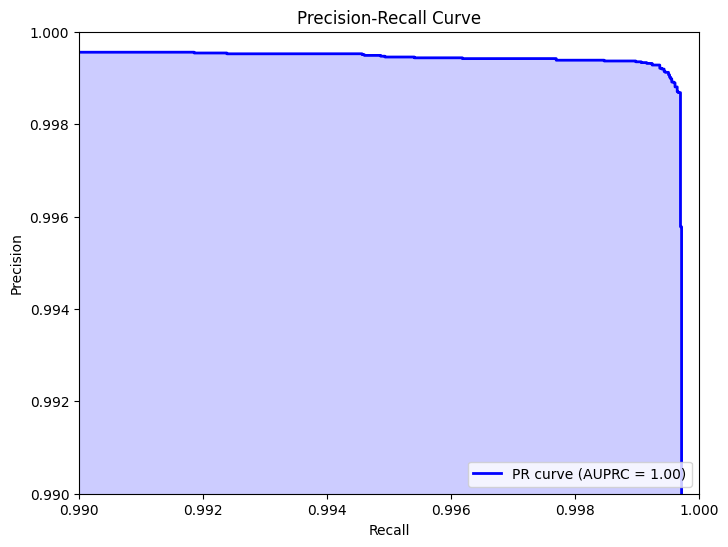

In [23]:
from sklearn.metrics import precision_recall_curve, auc

y_pred = model.predict(X_val)
precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
auprc = auc(recall, precision)
print("Area Under Precision-Recall Curve (AUPRC):", auprc)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUPRC = %0.2f)' % auprc)
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlim([0.99, 1.0])
plt.ylim([0.99, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

1781/1781 [==============================] - 2s 890us/step
[[56833    31]
 [   13    85]]
0.9992275552122467


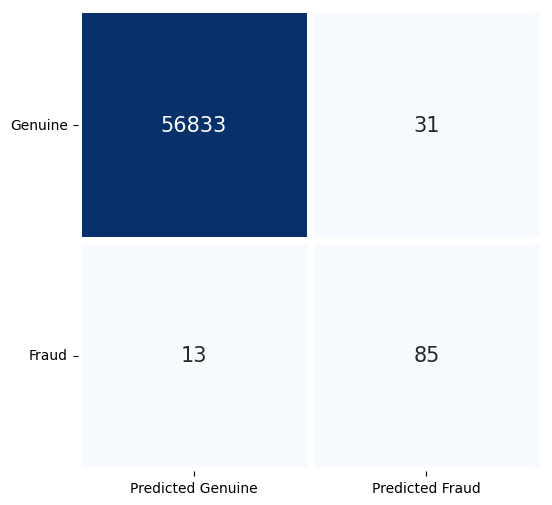

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['Genuine', 'Fraud'], xticklabels = ['Predicted Genuine', 'Predicted Fraud'])
plt.yticks(rotation = 0)
plt.show()

### TITLE: CREDIT CARD FRAUD DETECTION
### NIM: 3337220051
### NAME: ABDUL AZIZ
### CLASS: B
### DEPARTEMENT: INFORMATICS ENGINEERING